In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests, re
from wordcloud import WordCloud

In [196]:
# matplotlib 한글화
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [151]:
from konlpy.tag import Okt
okt = Okt()

In [152]:
df_word = pd.read_excel('./감성사전_편집.xlsx')
df_word.set_index('Unnamed: 0', drop=True, inplace=True)
std_df = pd.read_csv('./stopwords-ko.txt')

In [153]:
def novel_score_extract(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    text = soup.select('div.detail_view_content')[0].text
    text = ' '.join(re.compile('[ㄱ-ㅎ가-힣]+').findall(text))

    okt = Okt()
    okt_li = okt.morphs(text)
    globals()['word_li'] = [i for i in okt_li if len(i) >= 2]
    #word_li = [i for i in word_li if i not in std_df ]
    


    
    
    
    mood_count = {'슬픔': 0,
    '분노': 0,
    '기쁨': 0,
    '긴장감': 0,
    '무서운': 0,
    '증오': 0,
    '차분히': 0,
    '섹시': 0,
    '브릿락': 0,
    '설렘': 0,
    '몽환': 0}
    mood_words = {}

    for word in word_li:
        if word in df_word.index:
            word_mood = df_word.columns[df_word.loc[word, :] == 1].values[0]
            if word_mood in mood_words:
                mood_count[word_mood] += 1
                mood_words[word_mood].append(word)
            else:
                mood_count[word_mood] += 1
                mood_words[word_mood] =[word]
    for mood in mood_words.keys():
        mood_words[mood] = set(mood_words[mood])

    novel_score = list(mood_count.values())
    return novel_score

In [154]:
df_emotion = pd.read_csv('./노래별감성점수_최종.csv')
emotion = df_emotion.drop(['Unnamed: 0', '노래', '가수'], axis=1)

In [155]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [156]:
def search_similarity(a):
    similarity_li = []
    for i in range(len(emotion)):
        b = emotion.iloc[i, :].values
        similarity_li.append(cosine_similarity(a, b))
    song_score = df_emotion.iloc[np.argmax(similarity_li), 3:].values
    title = df_emotion.iloc[np.argmax(similarity_li), 1]
    singer = df_emotion.iloc[np.argmax(similarity_li), 2]
    return f"{singer} - {title}", song_score

In [157]:
# 로맨스 https://novel.naver.com/webnovel/detail?novelId=994958&volumeNo=2
# 판타지 https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102
# 무협 https://novel.naver.com/webnovel/detail?novelId=927909&volumeNo=114
# 미스터리 https://novel.naver.com/webnovel/detail?novelId=987046&volumeNo=84

In [189]:
url = 'https://novel.naver.com/webnovel/detail?novelId=987046&volumeNo=84'
novel_score = novel_score_extract(url)
music, song_score = search_similarity(novel_score)

In [190]:
music

'하성운 - LA LA POP!'

In [191]:
# word_counts = {}
# for i in word_li:
#     if i in word_counts:
#         word_counts[i] += 1
#     else:
#         word_counts[i] = 1

# sorted(word_counts.items(), key = lambda item: item[1], reverse=True)

In [192]:
# 단어별 개수

counter={}
for i in word_li:
    for j in df_word.index:
        if i == j:
            if i in counter:
                counter[i] += 1
            else:
                counter[i] = 1

In [193]:
counter

{'인정': 1,
 '웃었다': 6,
 '움찔': 1,
 '웃음': 3,
 '나쁘지': 1,
 '관심': 2,
 '욕심': 1,
 '조건': 3,
 '좋고': 2,
 '의지': 1,
 '황당한': 1,
 '괴상한': 1,
 '없다': 1,
 '유명하다': 1,
 '괜찮고': 1,
 '몰래': 1,
 '확보': 1,
 '힘들게': 1,
 '어울리는': 1,
 '취향': 1,
 '관계': 1,
 '당황': 1,
 '덤벼': 1,
 '의심': 2,
 '의혹': 1,
 '자연': 1,
 '다행': 2,
 '그린': 5,
 '햇볕': 1,
 '어려울': 1,
 '히죽': 2,
 '웃으며': 2,
 '빨리': 1,
 '치기': 1,
 '매력': 1,
 '참고': 1,
 '한계': 1,
 '놀랄': 1,
 '얄밉게': 1,
 '아득하다': 1,
 '움직임': 1,
 '바람': 1,
 '때리는': 1,
 '눈빛': 1,
 '으쓱': 1,
 '가슴': 1,
 '음침한': 1,
 '시선': 2,
 '가볍게': 1}

In [194]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.family'] ="AppleGothic"
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] =False

In [195]:
bar_label = df_emotion.columns[3:].values
index = np.arange(len(bar_label))

# 로맨스

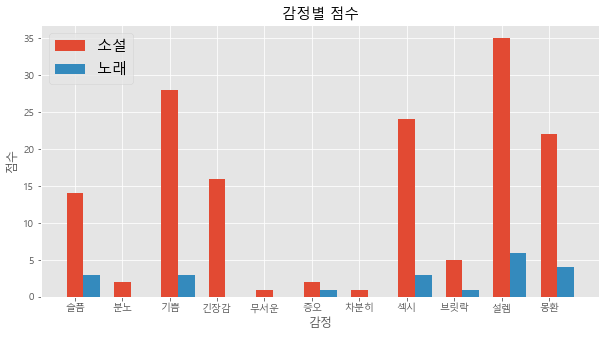

In [169]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

In [166]:
from collections import Counter
from PIL import Image

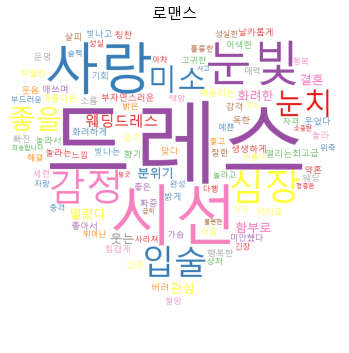

In [170]:
im = Image.open('./heart.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='white', colormap='Set1', font_path='malgun',
                      width = 400, height = 400, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (6, 6))  
plt.imshow(wordcloud)
plt.title("로맨스", size = 15)
plt.axis('off')
plt.show()

# 판타지

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

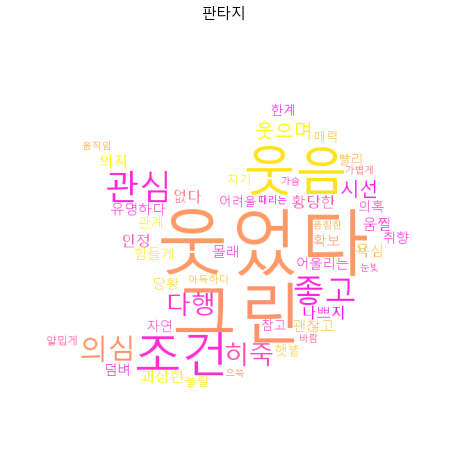

In [144]:
im = Image.open('./bird.jpg') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='white', colormap='spring', font_path='malgun',
                      width = 300, height = 300, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (8, 8))  
plt.imshow(wordcloud)
plt.title("판타지", size = 15)
plt.axis('off')
plt.show()

# 무협

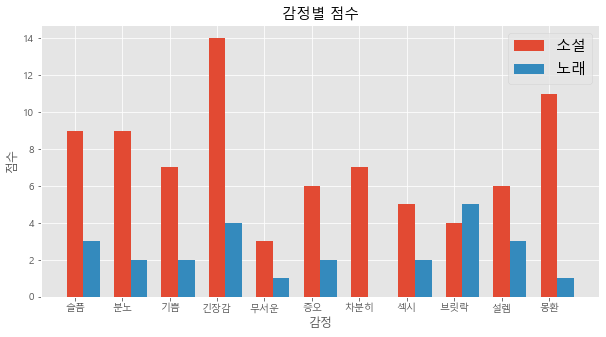

In [187]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

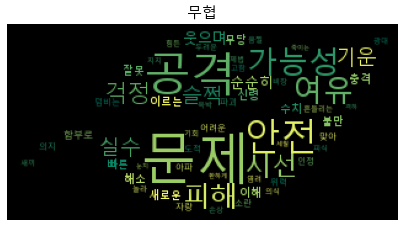

In [188]:
im = Image.open('./leaf.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='black', colormap='summer', font_path='malgun',
                      width = 200, height = 200, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (7, 7))  
plt.imshow(wordcloud)
plt.title("무협", size = 15)
plt.axis('off')
plt.show()

# 미스터리

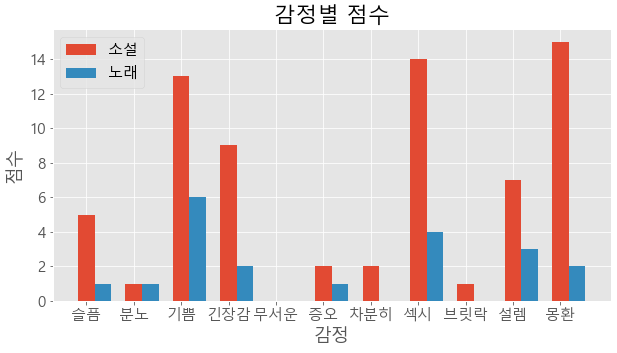

In [197]:
plt.figure(figsize=(10, 5))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
plt.style.use ('ggplot')
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

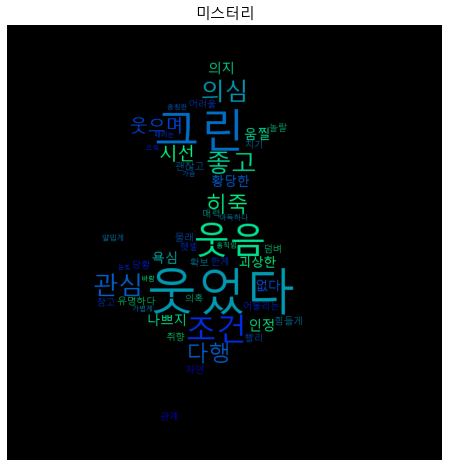

In [198]:
im = Image.open('./alice_mask.png') 
mask_arr = np.array(im) 
wordcloud = WordCloud(background_color ='black', colormap='winter', font_path='malgun',
                      width = 300, height = 300, random_state = 43, mask = mask_arr,
                      prefer_horizontal = True).generate_from_frequencies(counter)
plt.figure(figsize = (8, 8))  
plt.imshow(wordcloud)
plt.title("미스터리", size = 15)
plt.axis('off')
plt.show()

In [ ]:
# matplotlib 한글화
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)